In [1]:
import sys
import os

print("Current Working Directory:", os.getcwd())

# Add the examples directory to sys.path so we can import the set_random_seed function and other utilities from causal_helpers
examples_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'examples'))
sys.path.append(examples_dir)
# Now import set_random_seed directly from causal_helpers
from causal_helpers import set_random_seed
from cyclic_obs_data_generator import sample_er_dcg, sample_sf_dcg, sample_nws_dcg
from cyclic_obs_data_generator import sample_W, sample_data

# Add the data directory to sys.path so we can save and load data files
data_dir = os.path.abspath(os.path.join(examples_dir, '..', 'data'))

# Use the function
#seed = 41 # main seed
seed = 22
set_random_seed(seed)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Current Working Directory:", os.getcwd())

Current Working Directory: /home/amine.mcharrak/pcax/examples
Current Working Directory: /home/amine.mcharrak/pcax/examples


In [2]:
# Example usage
num_samples = 5000
n_vars = 10
max_degree = int(n_vars // 2) # ensure that no node has more than half the number of nodes as neighbors
max_cycle = 3 # maximum cycle length in the graph

# SELECT 1 NOISE TYPE
#noise_type = "gauss-ev"
#noise_type = "softplus"
#noise_type = "exp"
noise_type = "uniform"

# SELECT 1 GRAPH TYPE
#graph_type = "sf"
#graph_type = "er"
graph_type = "nws"

# Generate data
B = sample_er_dcg(n_vars=n_vars, max_degree=max_degree, max_cycle=max_cycle)
#B = sample_sf_dcg(n_vars=n_vars, max_degree=max_degree, max_cycle=max_cycle)
#B = sample_nws_dcg(n_vars=n_vars, max_degree=max_degree, max_cycle=max_cycle)
print("B created")

#W, noise_scales = sample_W(B)
W, _ = sample_W(B)
print("W created")

scales = np.ones(n_vars, dtype=float)
X, prec_matrix = sample_data(W=W, scales=scales, num_samples=num_samples, noise_type=noise_type)
print("X created")

data = pd.DataFrame(X, columns=[f"X{i}" for i in range(n_vars)])

# Display the adjacency matrix and a preview of the data
print("Adjacency Matrix:")
print(B)
print("\nGenerated Data:")
print(data.head())
print("\nTrue Weights:")
print(W)

B created
W created
X created
Adjacency Matrix:
[[0. 1. 1. 1. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 1. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Generated Data:
         X0        X1        X2        X3        X4        X5        X6  \
0  0.686562  2.224650  1.079406 -1.836872  2.826021  0.003315  0.989892   
1  0.367904 -2.131842  0.750944  2.454490  1.602051  0.585141  0.299740   
2 -0.132641  0.595935 -0.181419 -0.672824  0.435618 -0.742403  0.824071   
3  0.425885 -4.017133 -0.079488  3.010625 -0.691720  0.279445 -0.072746   
4  0.362679  4.892273  0.462301 -3.937928  0.372724  0.009660 -0.785374   

         X7        X8        X9  
0  1.131793 -0.540826  1.553398  
1 -2.934535  3.131450  1.537701  
2  0.343268  0.099114  1.280575  
3 -3.515191  4.17

In [3]:
data.describe()

X0           X1           X2           X3           X4  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     -0.016383     0.076920    -0.000182    -0.071232     0.008742   
std       0.581365     2.608494     0.636138     2.423908     1.059171   
min      -0.999976    -8.153996    -1.870913    -7.968753    -3.529454   
25%      -0.525073    -1.743334    -0.435626    -1.756984    -0.714378   
50%      -0.015991     0.085761    -0.003148    -0.075861     0.013108   
75%       0.478281     1.881689     0.453086     1.628811     0.739853   
max       0.999575     8.355782     1.855398     7.635825     3.171886   

                X5           X6           X7           X8           X9  
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  
mean     -0.020522     0.015386     0.049724    -0.054510    -0.003245  
std       0.594877     0.544885     2.471896     2.463135     1.321734  
min      -1.784565    -1.513075    -8.312388    -7.747234    -4.505822  
25%      -0.440975    -0.371880    -1.654291    -1.713360    -0.896990  
50%      -0.020968     0.010653     0.081233    -0.060933    -0.004290  
75%       0.385313     0.401779     1.770309     1.651636     0.882855  
max       1.880742     1.528599     8.398701     8.465293     4.756931

In [4]:
is_cont = np.array([True if data[col].nunique() > 2 else False for col in data.columns])
is_cont.shape
print(is_cont.tolist())

[True, True, True, True, True, True, True, True, True, True]


In [5]:
import networkx as nx

G = nx.DiGraph(B)

print("Is the graph directed?", G.is_directed())

is_cyclic = False  # Initialize is_cyclic to False
try:
    cycles = nx.find_cycle(G)
    is_cyclic = True  # Set to True if a cycle is found
    print("Is the graph cyclic?", is_cyclic)
    print(f"There are {len(list(nx.simple_cycles(G)))} cycles in the graph, including: {cycles} for example.")
except nx.NetworkXNoCycle:
    print("Is the graph cyclic?", is_cyclic)  # Use the boolean variable directly

print(f"Number of edges: {G.number_of_edges()}")
print(f"Number of nodes: {G.number_of_nodes()}")

Is the graph directed? True
Is the graph cyclic? True
There are 2 cycles in the graph, including: [(1, 7), (7, 3), (3, 1)] for example.
Number of edges: 23
Number of nodes: 10


In [6]:
# Save all the data to a directory

dir_name = os.path.join(data_dir, "linear_cyclic_" + noise_type + "_" + graph_type + "_nvars_" + str(n_vars) + "_max_degree_" + str(max_degree) + "_max_cycle_" + str(max_cycle) + "_n_samples_" + str(num_samples))
#dir_name = os.path.join(data_dir, "linear_cyclic_uniform")

os.makedirs(dir_name, exist_ok=True)

# store the adjacency matrix as a csv file named "adj_matrix.csv" without header
adj_matrix_df = pd.DataFrame(B)
adj_matrix_df.to_csv(f"{dir_name}/adj_matrix.csv", header=False, index=False)

# store the data as a csv file named "train.csv" without header
data.to_csv(f"{dir_name}/train.csv", header=False, index=False)

# store the weighted adjacency matrix as a csv file named "W.csv" without header
W_df = pd.DataFrame(W)
W_df.to_csv(f"{dir_name}/W_adj_matrix.csv", header=False, index=False)

# store the precision matrix as a csv file named "prec_matrix.csv" without header
if prec_matrix is not None:
    prec_matrix_df = pd.DataFrame(prec_matrix)
    prec_matrix_df.to_csv(f"{dir_name}/prec_matrix.csv", header=False, index=False)

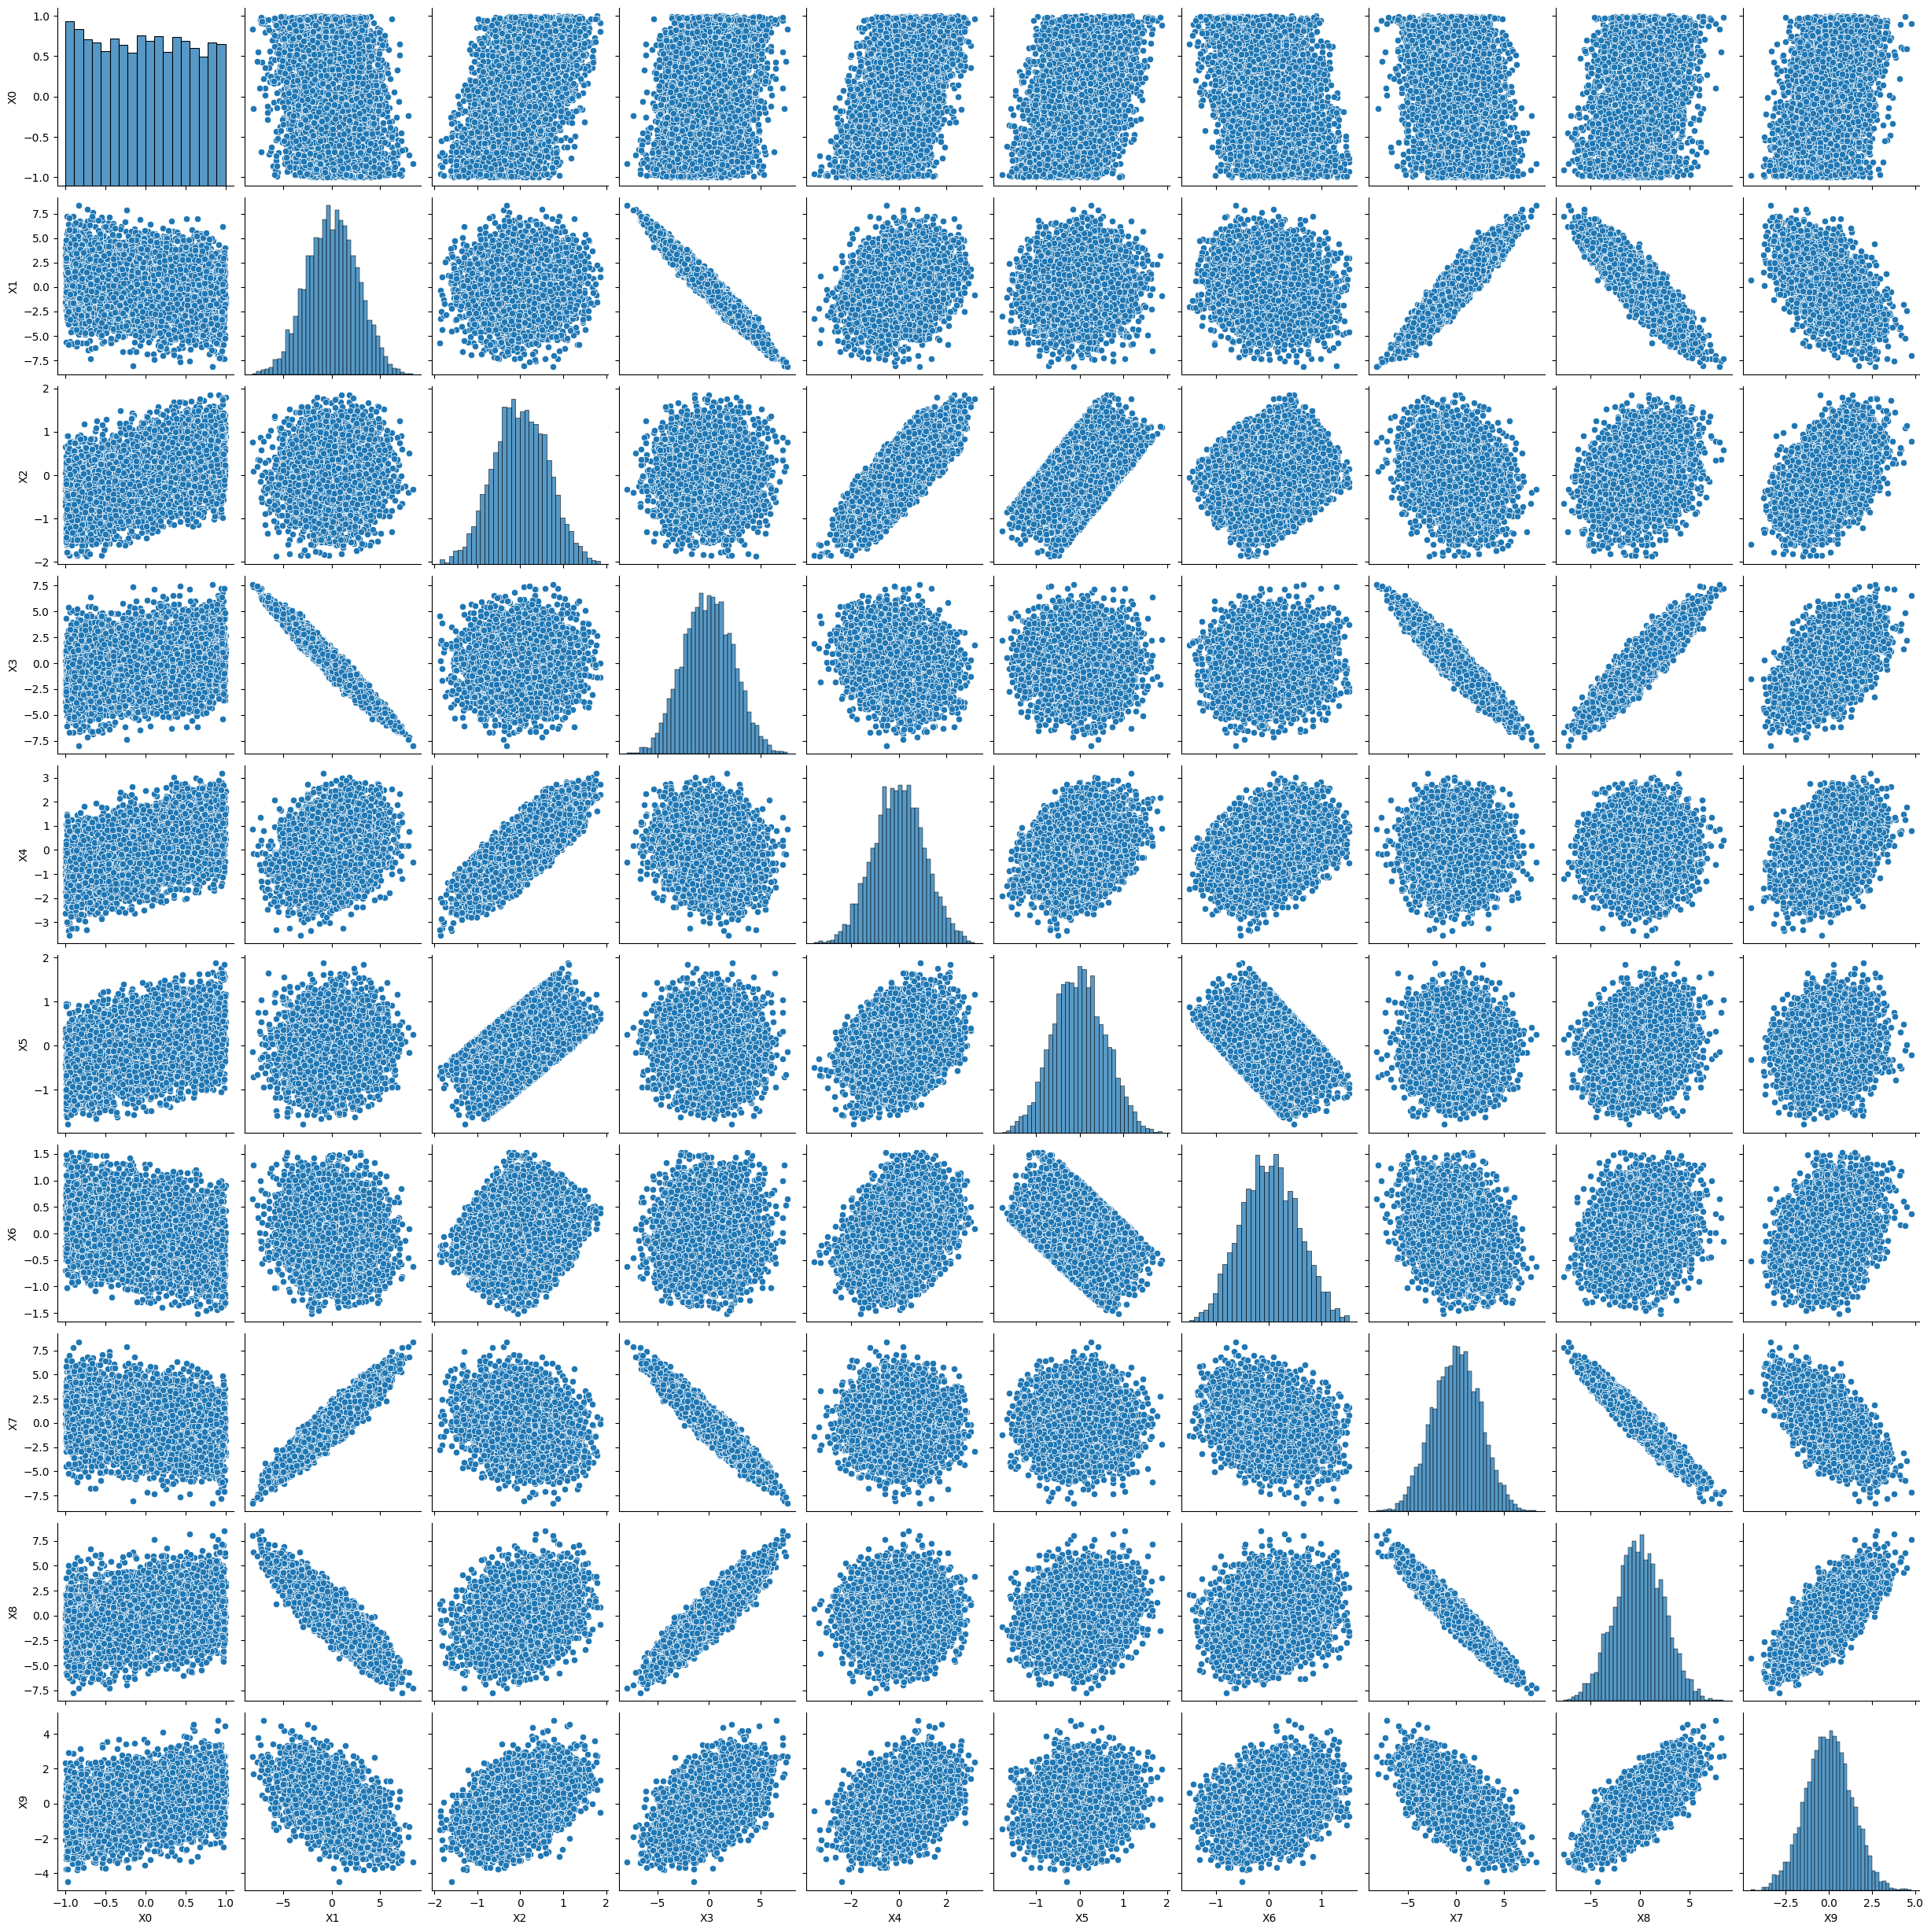

In [7]:
# plot the distribution of all variables against each other and save the plot as "pairplot.pdf"
import seaborn as sns
sns.pairplot(data)
plt.savefig(f"{dir_name}/pairplot.pdf")

In [8]:
################################## MISC ##################################

In [ ]:
# Parameters for the uniform distribution
low, high = -1, 1  # Range of the uniform distribution
size = 100000  # Number of samples

# Generate uniform samples
uniform_samples = np.random.uniform(0.5, 1.5, size)

# Apply the power transformation
power = 5
transformed_samples = uniform_samples**power

# Plot the original and transformed distributions
plt.figure(figsize=(12, 6))

# Original uniform distribution
plt.subplot(1, 2, 1)
plt.hist(uniform_samples, bins=100, density=True, alpha=0.7, color='blue')
plt.title("Original Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")

# Transformed distribution
plt.subplot(1, 2, 2)
plt.hist(transformed_samples, bins=100, density=True, alpha=0.7, color='orange')
plt.title(f"Transformed Distribution (x**{power})")
plt.xlabel("Value")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


In [ ]:
n_var = 5
noise_scales = np.random.uniform(0.5, 1.5, size=n_var)
noise = (np.random.uniform(-np.array(noise_scales).reshape(-1, 1), np.array(noise_scales).reshape(-1, 1), size=(n_var, 5000)).T)**4

# Plot histograms for each row
for i in range(n_var):
    plt.figure()
    plt.hist(noise[:, i], bins=50, alpha=0.75)
    plt.title(f'Distribution of Row {i+1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate samples from transformed Gaussian distribution
np.random.seed(42)
x = np.random.normal(0, 1, 100000)  # Original Gaussian samples
y = np.sign(x) * (x ** 2)          # Apply transformation

# Theoretical PDF calculation
def theoretical_pdf(y):
    with np.errstate(divide='ignore', invalid='ignore'):
        pdf = 1 / (2 * np.sqrt(2 * np.pi * np.abs(y))) * np.exp(-np.abs(y)/2)
    return np.nan_to_num(pdf)

# Create visualization
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=100, stat='density', alpha=0.6, color='skyblue', label='Empirical Distribution')

# Plot theoretical distribution
x_range = np.linspace(-10, 10, 1000)
plt.plot(x_range, theoretical_pdf(x_range), 'r-', lw=2, label='Theoretical PDF')

plt.title('Noise Distribution: sign(x) · x² where x ∼ N(0,1)')
plt.xlabel('Transformed Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.xlim(-10, 10)  # Focus on central region
plt.show()